### Loading the data

In [303]:
import pandas as pd
import numpy as np

In [304]:
cars = pd.read_csv('imports-85.data', header=None)

In [305]:
cars.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


The dataset has no column names. Let's add them. Here is what we have in documentation:

In [306]:
names = [
'symboling',
'normalized-losses',
'make',
'fuel-type',
'aspiration',
'num-of-doors',
'body-style',
'drive-wheels',
'engine-location',
'wheel-base',
'length',
'width',
'height',
'curb-weight',
'engine-type',
'num-of-cylinders',
'engine-size',
'fuel-system',
'bore',
'stroke',
'compression-ratio',
'horsepower',
'peak-rpm',
'city-mpg',
'highway-mpg',
'price'
]

In [307]:
names = pd.Series(names).str.replace('-', '_')

In [308]:
cars.columns = names

In [309]:
cars.columns

Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')

In [310]:
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Data cleaning

From documenation - missing values are denoted as "?". We'll replace it to the format understandable for pandas.

In [311]:
cars.replace({"?":np.nan}, inplace=True)

In [312]:
cars.isnull().sum()

symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_of_doors          2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

We see that most of the columns have almost no missing values. Except _normalized_losses_. We'll get rid of it later.

Now let's see which columns are good for our model (i.e. have numeric values).

In [313]:
pd.concat([pd.Series(cars.dtypes, name='Type'),
           cars.head(3).T], axis=1)

,Type,0,1,2
symboling,int64,3,3,1
normalized_losses,object,NaN,NaN,NaN
make,object,alfa-romero,alfa-romero,alfa-romero
fuel_type,object,gas,gas,gas
aspiration,object,std,std,std
num_of_doors,object,two,two,two
body_style,object,convertible,convertible,hatchback
drive_wheels,object,rwd,rwd,rwd
engine_location,object,front,front,front
wheel_base,float64,88.6,88.6,94.5


Looking at the format of the columns together with top 3 values - we can see that many of them are OK, but some have numeric values but the text format (`object`) - e.g. _horsepower_.  
We'll keep only the columns with numeric values and covert formats.

In [314]:
cols_to_keep = [    
    'normalized_losses',
    'wheel_base',
    'length',
    'width',
    'height',
    'curb_weight',
    'engine_size',
    'bore',
    'stroke',
    'compression_ratio',
    'horsepower',
    'peak_rpm',
    'city_mpg',
    'highway_mpg',
    'price'
]

cars2 = cars[cols_to_keep].copy()

In [315]:
cars2 = cars2.astype('float')

In [316]:
cars2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
normalized_losses    164 non-null float64
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null float64
engine_size          205 non-null float64
bore                 201 non-null float64
stroke               201 non-null float64
compression_ratio    205 non-null float64
horsepower           203 non-null float64
peak_rpm             203 non-null float64
city_mpg             205 non-null float64
highway_mpg          205 non-null float64
price                201 non-null float64
dtypes: float64(15)
memory usage: 24.1 KB


Now we'll replace all NAs with mean of considered column. Everywhere except _price_ as this is our target variable for prediction. 

In [317]:
cars2 = cars2.dropna(subset=['price'])

In [318]:
cars2 = cars2.fillna(cars2.mean())

In [319]:
cars2.isnull().sum()

normalized_losses    0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_size          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

Now let's standartize columns.

In [320]:
price = cars2['price'].copy()
cars2 = (cars2 - cars2.mean())/cars2.std()
#cars2 = (cars2 - cars2.min())/(cars2.max() - cars2.min())
cars2['price'] = price

In [321]:
pd.concat([cars2.mean().round(2),
          cars2.std().round(2)],
          axis=1)

,0,1
normalized_losses,-0.00,1.00
wheel_base,-0.00,1.00
length,-0.00,1.00
width,0.00,1.00
height,-0.00,1.00
curb_weight,0.00,1.00
engine_size,-0.00,1.00
bore,-0.00,1.00
stroke,0.00,1.00
compression_ratio,-0.00,1.00


In [322]:
cars2.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0.000000,-1.680910,-0.438315,-0.851335,-2.029015,-0.014821,0.075201,0.519597,-1.825369,-0.290709,0.203476,-0.245942,-0.650624,-0.540937,13495.0
1,0.000000,-1.680910,-0.438315,-0.851335,-2.029015,-0.014821,0.075201,0.519597,-1.825369,-0.290709,0.203476,-0.245942,-0.650624,-0.540937,16500.0
2,0.000000,-0.708334,-0.243544,-0.185134,-0.558319,0.516789,0.604724,-2.427374,0.674254,-0.290709,1.354267,-0.245942,-0.961995,-0.687669,16500.0
3,1.312654,0.165335,0.194690,0.147966,0.217881,-0.422710,-0.430252,-0.524899,0.452769,-0.041019,-0.037387,0.799836,-0.183569,-0.100741,13950.0
4,1.312654,0.099398,0.194690,0.243137,0.217881,0.518722,0.219617,-0.524899,0.452769,-0.540399,0.310527,0.799836,-1.117680,-1.274597,17450.0


### Univariate model

In [323]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [324]:
def knn_train_test(train_col, target_col, df):
    knn = KNeighborsRegressor()
    
    np.random.seed(1)
    
    # Randomizing df
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Dividing df into train and test
    middle_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[:middle_row]
    test_df = rand_df.iloc[middle_row:]
    
    # Fit a KNN model using default k value.
    knn.fit(train_df[[train_col]], 
            train_df[target_col])
    
    # Make predictions using model.
    predictions = knn.predict(test_df[[train_col]])

    # Calculate and return RMSE.
    mse = mean_squared_error(test_df[target_col], predictions)
    rmse = np.sqrt(mse)
    return rmse

rmse_results = {}
train_cols = cars2.columns.drop('price')

# Training a model for each column except 'price'

for col in train_cols:
    rmse_val = knn_train_test(col, 'price', cars2)
    rmse_results[col] = rmse_val

# Create a Series object from the dictionary so 

rmse_results = pd.Series(rmse_results)
rmse_results.sort_values()

engine_size          3297.699744
horsepower           4047.376555
curb_weight          4453.680703
highway_mpg          4625.047587
city_mpg             4754.637378
width                4772.510209
length               5429.644740
wheel_base           5461.490336
compression_ratio    6606.571346
bore                 6793.057484
normalized_losses    7337.284820
peak_rpm             7643.070323
stroke               8006.096427
height               8132.467732
dtype: float64

Adding non-defauld k-value.

In [355]:
k_values = [1, 3, 5, 7, 9, 11]

def knn_train_test(train_col, target_col, df):
    
    np.random.seed(1)    
    # Randomizing df
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Dividing df into train and test
    middle_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[:middle_row]
    test_df = rand_df.iloc[middle_row:]
    
    rmses_dict = {}
    
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[train_col]], 
                train_df[target_col])                
        predictions = knn.predict(test_df[[train_col]])
        mse = mean_squared_error(test_df[target_col], predictions)
        rmse = np.sqrt(mse)
        rmses_dict[k] = rmse 
        
    return rmses_dict

final_dict = {}

train_cols = cars2.columns.drop('price')

for col in train_cols:
    rmses_dict = knn_train_test(col, 'price', cars2)
    final_dict[col] = rmses_dict

final_dict

{'bore': {1: 8602.5884845006603,
  3: 6977.1234117944587,
  5: 6793.0574839170895,
  7: 6828.8678082042015,
  9: 6865.299025218018,
  11: 6775.2473305154808},
 'city_mpg': {1: 5901.1435743547636,
  3: 4608.1804463803974,
  5: 4754.6373781835146,
  7: 5035.4568969100028,
  9: 5333.1616578530175,
  11: 5164.7203153240371},
 'compression_ratio': {1: 8083.0701775408024,
  3: 7379.6233216633063,
  5: 6606.5713459335993,
  7: 6732.0329054460271,
  9: 7019.9512505224375,
  11: 7109.0160527399794},
 'curb_weight': {1: 5288.0195725810245,
  3: 5011.8789151002002,
  5: 4453.6807026534934,
  7: 4330.1493645014953,
  9: 4632.9252512130197,
  11: 4730.5565221835886},
 'engine_size': {1: 3227.6597873645692,
  3: 2946.7417879781224,
  5: 3297.6997444813674,
  7: 3563.43509928404,
  9: 3831.764970642862,
  11: 4152.1700783598535},
 'height': {1: 8904.0464563607093,
  3: 8277.6096430455254,
  5: 8132.4677317722462,
  7: 7704.3449641702009,
  9: 7779.5646928298902,
  11: 7777.2280107935221},
 'highway_m

#### Visualizing the results.

In [356]:
import matplotlib.pyplot as plt
%matplotlib inline

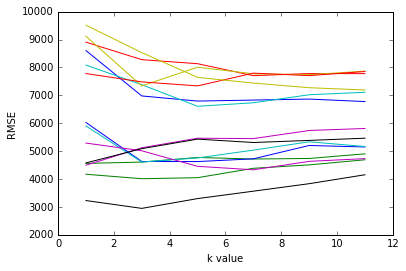

In [357]:
for k, v in final_dict.items():
    t = pd.Series(v)
    x = t.index.values
    y = t.values
    
    plt.plot(x, y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

### Multivariate model

In [362]:
# Function was modified to accept the list of features now.

def knn_train_test(features_list, target_col, df, k):
    knn = KNeighborsRegressor(n_neighbors=k)
    
    np.random.seed(1)
    
    # Randomizing df
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Dividing df into train and test
    middle_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[:middle_row]
    test_df = rand_df.iloc[middle_row:]
    
    # Fit a KNN model using default k value.
    knn.fit(train_df[features_list], 
            train_df[target_col])
    
    # Make predictions using model.
    predictions = knn.predict(test_df[features_list])

    # Calculate and return RMSE.
    mse = mean_squared_error(test_df[target_col], predictions)
    rmse = np.sqrt(mse)
    return rmse


Picking top features

In [363]:
# average RMSE across different `k` values for each feature.
feature_avg_rmse = {}
for k,v in final_dict.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
feature_avg_rmse = pd.Series(feature_avg_rmse)
feature_avg_rmse.sort_values()

engine_size          3503.245245
horsepower           4301.131727
width                4715.358244
curb_weight          4741.201721
highway_mpg          5058.503566
city_mpg             5132.883378
length               5207.950752
wheel_base           5345.513101
bore                 7140.363924
compression_ratio    7155.044176
normalized_losses    7658.491775
peak_rpm             7930.906178
stroke               7972.520302
height               8095.876916
dtype: float64

In [364]:
# different lists of top features (picked from univariate model)

top_2_features = ['engine_size', 'horsepower']
top_3_features = ['engine_size', 'horsepower', 'width']
top_4_features = ['engine_size', 'horsepower', 'width', 'curb_weight']
top_5_features = ['engine_size', 'horsepower', 'width', 'curb_weight', 'highway_mpg']

all_top_features = {'top2': top_2_features, 
                    'top3': top_3_features, 
                    'top4': top_4_features, 
                    'top5': top_5_features}

In [365]:
rmse_results = {}

for k, v in all_top_features.items():
    rmse = knn_train_test(v, 'price', cars2, 5)
    rmse_results[k] = rmse

rmse_results

{'top2': 2938.1306900277887,
 'top3': 3576.5381752208214,
 'top4': 3435.1458370759451,
 'top5': 3457.4725012114936}

Varying hyperparameter k for top multivariate models.

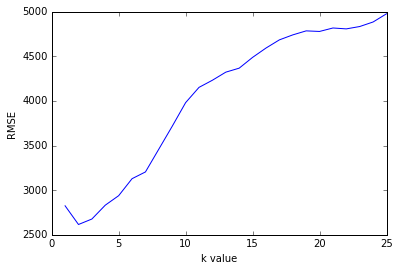

In [370]:
# top2 model

top2_k_rmse = {}

for k in range(1,26):
    rmse = knn_train_test(top_2_features, 'price', cars2, k)
    top2_k_rmse[k] = rmse

    
top2_k_rmse = pd.Series(top2_k_rmse)
x = top2_k_rmse.index.values
y = top2_k_rmse.values

plt.plot(x, y)
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.show()

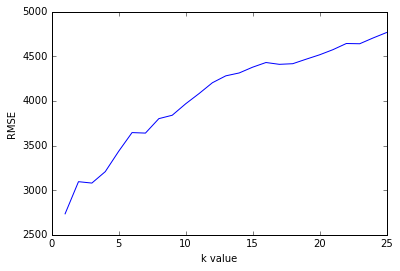

In [371]:
# top4 model

top4_k_rmse = {}

for k in range(1,26):
    rmse = knn_train_test(top_4_features, 'price', cars2, k)
    top4_k_rmse[k] = rmse

    
top4_k_rmse = pd.Series(top4_k_rmse)
x = top4_k_rmse.index.values
y = top4_k_rmse.values

plt.plot(x, y)
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.show()